# To implement classification weather for given recoed the Global intensity is greater then 15 or not

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Dell\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv("hpc_breakdowns.csv")
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [6]:
df['y_lgreg'] = df['Global_intensity'].apply(lambda x : 1 if x >15 else 0)
df.drop(['Global_intensity'],1,inplace=True)

In [7]:
df.drop('Unnamed: 0',1,inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,16/12/2006,17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,1
1,16/12/2006,17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,1
2,16/12/2006,17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,1
3,16/12/2006,17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,1
4,16/12/2006,17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   y_lgreg                int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 140.7+ MB


In [9]:
100*round(df.isnull().sum()/len(df),5)

Date                     0.000
Time                     0.000
Global_active_power      0.100
Global_reactive_power    0.023
Voltage                  0.099
Sub_metering_1           0.063
Sub_metering_2           0.059
Sub_metering_3           0.006
y_lgreg                  0.000
dtype: float64

In [10]:
df.shape

(2049280, 9)

In [11]:
df['DateTime'] = df.Date+' '+df.Time
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,1,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,1,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,1,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,1,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,1,16/12/2006 17:28:00


In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format= "%d/%m/%Y %H:%M:%S")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   y_lgreg                int64         
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 156.3+ MB


In [14]:
df.drop(['Date', 'Time'],1,inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
0,4.216,0.418,234.84,0.0,1.0,17.0,1,2006-12-16 17:24:00
1,5.360,0.436,233.63,0.0,1.0,16.0,1,2006-12-16 17:25:00
2,5.374,0.498,233.29,0.0,2.0,17.0,1,2006-12-16 17:26:00
3,5.388,0.502,233.74,0.0,1.0,17.0,1,2006-12-16 17:27:00
4,3.666,0.528,235.68,0.0,1.0,17.0,1,2006-12-16 17:28:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Sub_metering_1         float64       
 4   Sub_metering_2         float64       
 5   Sub_metering_3         float64       
 6   y_lgreg                int64         
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 125.1 MB


In [16]:
df.DateTime.max()

Timestamp('2010-11-26 21:02:00')

In [17]:
df.DateTime.min()

Timestamp('2006-12-16 17:24:00')

In [18]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
0,4.216,0.418,234.84,0.0,1.0,17.0,1,2006-12-16 17:24:00
1,5.360,0.436,233.63,0.0,1.0,16.0,1,2006-12-16 17:25:00
2,5.374,0.498,233.29,0.0,2.0,17.0,1,2006-12-16 17:26:00
3,5.388,0.502,233.74,0.0,1.0,17.0,1,2006-12-16 17:27:00
4,3.666,0.528,235.68,0.0,1.0,17.0,1,2006-12-16 17:28:00


In [19]:
df.y_lgreg.value_counts(normalize = True)

0    0.962155
1    0.037845
Name: y_lgreg, dtype: float64

### we can see that this is unbalanced dataset, so we need to split the data with stratify option in train_test_split inorder to make sure no 0's and 1's are same in train as well as test set

In [20]:
len(df)

2049280

In [21]:
1971725/2049280

0.962155000780762

In [22]:
77555/2049280

0.03784499921923798

In [23]:
df.tail(200000)

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
1849280,0.376,0.208,237.01,0.0,0.0,1.0,0,2010-07-02 07:58:00
1849281,0.380,0.218,239.24,0.0,0.0,0.0,0,2010-07-02 07:59:00
1849282,0.378,0.216,238.64,0.0,0.0,1.0,0,2010-07-02 08:00:00
1849283,0.378,0.218,239.13,0.0,0.0,1.0,0,2010-07-02 08:01:00
1849284,0.376,0.214,238.32,0.0,0.0,0.0,0,2010-07-02 08:02:00
...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,0.0,0.0,0.0,0,2010-11-26 20:58:00
2049276,0.944,0.000,240.00,0.0,0.0,0.0,0,2010-11-26 20:59:00
2049277,0.938,0.000,239.82,0.0,0.0,0.0,0,2010-11-26 21:00:00
2049278,0.934,0.000,239.70,0.0,0.0,0.0,0,2010-11-26 21:01:00


In [24]:
df.drop('DateTime',1,inplace=True)

In [25]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,4.216,0.418,234.84,0.0,1.0,17.0,1
1,5.360,0.436,233.63,0.0,1.0,16.0,1
2,5.374,0.498,233.29,0.0,2.0,17.0,1
3,5.388,0.502,233.74,0.0,1.0,17.0,1
4,3.666,0.528,235.68,0.0,1.0,17.0,1


#### We can see from plots that there are no major outliers so we can continue to build our model

# Separating out CV set and train_test set

In [26]:
df_valid = df[df.index >= 1849280]
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
1849280,0.376,0.208,237.01,0.0,0.0,1.0,0
1849281,0.380,0.218,239.24,0.0,0.0,0.0,0
1849282,0.378,0.216,238.64,0.0,0.0,1.0,0
1849283,0.378,0.218,239.13,0.0,0.0,1.0,0
1849284,0.376,0.214,238.32,0.0,0.0,0.0,0


In [27]:
df_train = df[df.index < 1849280]
df_train.tail()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
1849275,0.450,0.322,236.90,0.0,2.0,1.0,0
1849276,0.386,0.216,236.69,0.0,0.0,0.0,0
1849277,0.378,0.204,236.54,0.0,0.0,1.0,0
1849278,0.376,0.204,236.15,0.0,0.0,1.0,0
1849279,0.374,0.202,235.70,0.0,0.0,0.0,0


In [28]:
df_train.y_lgreg.value_counts(normalize = True)

0    0.959995
1    0.040005
Name: y_lgreg, dtype: float64

In [29]:
df.shape

(2049280, 7)

In [30]:
df_valid.y_lgreg.value_counts(normalize = True)

0    0.98213
1    0.01787
Name: y_lgreg, dtype: float64

In [31]:
df_train.isnull().sum()

Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
y_lgreg                     0
dtype: int64

In [32]:
df_train.isnull().sum()/len(df_train) *100

Global_active_power      0.107988
Global_reactive_power    0.023739
Voltage                  0.108366
Sub_metering_1           0.064998
Sub_metering_2           0.060997
Sub_metering_3           0.006976
y_lgreg                  0.000000
dtype: float64

In [33]:
df_valid.isnull().sum()

Global_active_power      46
Global_reactive_power    38
Voltage                  27
Sub_metering_1           95
Sub_metering_2           82
Sub_metering_3            0
y_lgreg                   0
dtype: int64

In [34]:
df_valid.isnull().sum()/len(df_valid)*100

Global_active_power      0.0230
Global_reactive_power    0.0190
Voltage                  0.0135
Sub_metering_1           0.0475
Sub_metering_2           0.0410
Sub_metering_3           0.0000
y_lgreg                  0.0000
dtype: float64

# Lets simply drop null values as there are very few 

In [35]:
df_train.dropna(inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_valid.dropna(inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_train.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
y_lgreg                  0
dtype: int64

In [38]:
df_valid.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
y_lgreg                  0
dtype: int64

# Data Analysis

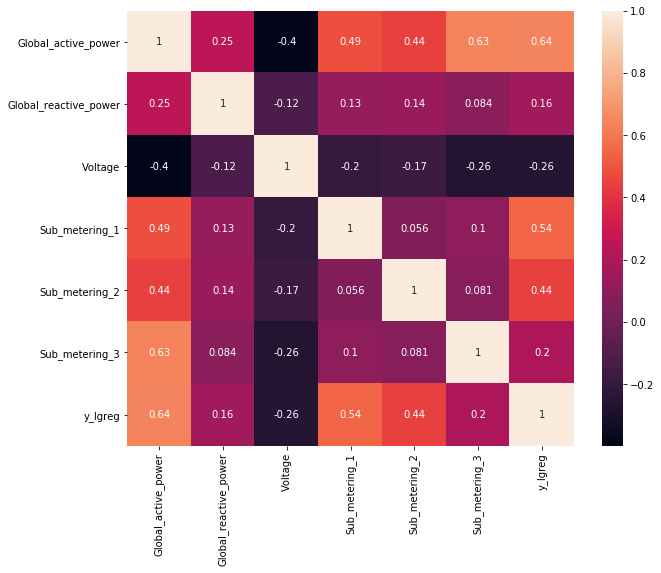

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot = True)

In [40]:
#sns.distplot(df_train.Global_intensity)

In [41]:
df_train.describe()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
count,1.842456e+06,1.842456e+06,1.842456e+06,1.842456e+06,1.842456e+06,1.842456e+06,1.842456e+06
mean,1.109725e+00,1.226025e-01,2.407987e+02,1.157135e+00,1.333879e+00,6.528509e+00,4.001778e-02
std,1.074741e+00,1.122573e-01,3.286167e+00,6.262623e+00,5.962079e+00,8.467338e+00,1.960010e-01
min,7.600000e-02,0.000000e+00,2.232000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.200000e-01,1.000000e-01,2.409800e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.544000e+00,1.940000e-01,2.429000e+02,0.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,8.800000e+01,8.000000e+01,3.100000e+01,1.000000e+00


In [42]:
df_train.Sub_metering_1.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1.0])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     0.0
0.90     0.0
0.95     1.0
0.98    37.0
0.99    38.0
1.00    88.0
Name: Sub_metering_1, dtype: float64

In [43]:
df_train.Sub_metering_2.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     1.0
0.90     2.0
0.95     2.0
0.98    27.0
0.99    37.0
Name: Sub_metering_2, dtype: float64

In [44]:
df_train.Sub_metering_3.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     1.0
0.60     1.0
0.70    17.0
0.80    18.0
0.90    18.0
0.95    19.0
0.98    19.0
0.99    20.0
Name: Sub_metering_3, dtype: float64

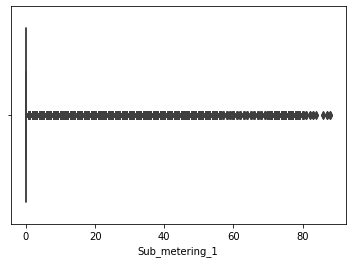

In [45]:
sns.boxplot(data = df_train, x = 'Sub_metering_1')

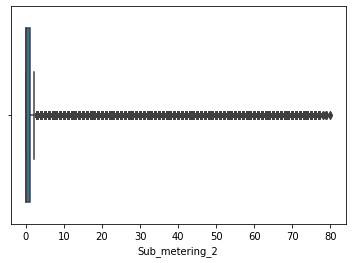

In [46]:
sns.boxplot(data = df_train, x = 'Sub_metering_2')

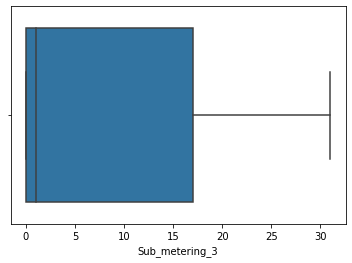

In [47]:
sns.boxplot(data = df_train, x = 'Sub_metering_3')

In [48]:
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,4.216,0.418,234.84,0.0,1.0,17.0,1
1,5.360,0.436,233.63,0.0,1.0,16.0,1
2,5.374,0.498,233.29,0.0,2.0,17.0,1
3,5.388,0.502,233.74,0.0,1.0,17.0,1
4,3.666,0.528,235.68,0.0,1.0,17.0,1


# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

C:\Users\Dell\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [50]:
X = df_train.drop(['y_lgreg'],1)
y = df_train.y_lgreg

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify =y)

# Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
var = X_train.columns.to_list()
var

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [54]:
X_train[var] = scaler.fit_transform(X_train[var])
X_train.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1331982,0.014847,0.090647,0.670436,0.0,0.0000,0.000000
747486,0.024081,0.178417,0.674637,0.0,0.0000,0.032258
960768,0.086185,0.083453,0.544750,0.0,0.0000,0.032258
1521173,0.237733,0.201439,0.386107,0.0,0.0125,0.548387
280942,0.003078,0.000000,0.451373,0.0,0.0000,0.000000


In [55]:
X_test[var] = scaler.transform(X_test[var])

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [56]:
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1331982,0.014847,0.090647,0.670436,0.0,0.0000,0.000000
747486,0.024081,0.178417,0.674637,0.0,0.0000,0.032258
960768,0.086185,0.083453,0.544750,0.0,0.0000,0.032258
1521173,0.237733,0.201439,0.386107,0.0,0.0125,0.548387
280942,0.003078,0.000000,0.451373,0.0,0.0000,0.000000


In [57]:
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1547592,0.031867,0.119424,0.642326,0.0,0.0250,0.000000
1503275,0.123121,0.061871,0.616478,0.0,0.0125,0.612903
1338260,0.052870,0.194245,0.611955,0.0,0.0125,0.193548
628762,0.022271,0.082014,0.624879,0.0,0.0000,0.000000
351963,0.022089,0.103597,0.619063,0.0,0.0000,0.000000


# Creating Logistic Regression Model

In [58]:
df_train.y_lgreg.value_counts()

0    1768725
1      73731
Name: y_lgreg, dtype: int64

In [59]:
df_valid.y_lgreg.value_counts()

0    196138
1      3574
Name: y_lgreg, dtype: int64

In [60]:
y_train.value_counts()

0    1238107
1      51612
Name: y_lgreg, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression()

C:\Users\Dell\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [62]:
lgreg = lgreg.fit(X_train,y_train)

## Train accuracy

In [63]:
from sklearn import metrics

In [64]:
train_pred = lgreg.predict(X_train)

In [65]:
print(metrics.classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1238107
           1       0.97      0.97      0.97     51612

    accuracy                           1.00   1289719
   macro avg       0.99      0.99      0.99   1289719
weighted avg       1.00      1.00      1.00   1289719



In [66]:
metrics.confusion_matrix(y_train,train_pred)

array([[1236732,    1375],
       [   1341,   50271]], dtype=int64)

In [67]:
51612-50712

900

In [68]:
metrics.accuracy_score(y_train,train_pred)

0.9978941149196066

# Test Accuracy

In [69]:
test_pred = lgreg.predict(X_test)

In [70]:
test_pred.shape

(552737,)

In [71]:
X_test.shape

(552737, 6)

In [72]:
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    530618
           1       0.97      0.97      0.97     22119

    accuracy                           1.00    552737
   macro avg       0.99      0.99      0.99    552737
weighted avg       1.00      1.00      1.00    552737



In [73]:
metrics.confusion_matrix(y_test,test_pred)

array([[530026,    592],
       [   592,  21527]], dtype=int64)

In [74]:
411/22119

0.0185813101858131

In [75]:
metrics.accuracy_score(y_test,test_pred)

0.9978579324344128

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
#np.mean(cross_val_score(LogisticRegression(), X_train,y_train,cv = 10))

# Transforming validation set

In [78]:
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
1849280,0.376,0.208,237.01,0.0,0.0,1.0,0
1849281,0.380,0.218,239.24,0.0,0.0,0.0,0
1849282,0.378,0.216,238.64,0.0,0.0,1.0,0
1849283,0.378,0.218,239.13,0.0,0.0,1.0,0
1849284,0.376,0.214,238.32,0.0,0.0,0.0,0


In [79]:
X_valid = df_valid.drop('y_lgreg',1)
y_valid = df_valid.y_lgreg

In [80]:
var

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [81]:
X_valid[var] = scaler.transform(X_valid[var])
X_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,0.027159,0.149640,0.446204,0.0,0.0,0.032258
1849281,0.027521,0.156835,0.518255,0.0,0.0,0.000000
1849282,0.027340,0.155396,0.498869,0.0,0.0,0.032258
1849283,0.027340,0.156835,0.514701,0.0,0.0,0.032258
1849284,0.027159,0.153957,0.488530,0.0,0.0,0.000000


# Logistic Regression Validation Results

In [82]:
valid_pred = lgreg.predict(X_valid)

In [83]:
print(metrics.classification_report(y_valid,valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196138
           1       0.97      0.96      0.96      3574

    accuracy                           1.00    199712
   macro avg       0.98      0.98      0.98    199712
weighted avg       1.00      1.00      1.00    199712



In [84]:
metrics.confusion_matrix(y_valid,valid_pred)

array([[196029,    109],
       [   141,   3433]], dtype=int64)

In [85]:
metrics.accuracy_score(y_valid,valid_pred)

0.9987481974042621

# KNN -- takes too much time to compute

In [86]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Dell\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [87]:
#knn = KNeighborsClassifier(n_neighbors=5)

In [88]:
#knn = knn.fit(X_train,y_train)

In [89]:
#knn_pred = knn.predict(X_train)

# SVM 

In [90]:
from sklearn.svm import SVC

In [91]:
svm = SVC(kernel='linear') # it took more more more more time

In [92]:
svm = svm.fit(X_train,y_train)

### Train Accuracy

In [93]:
svm_train_pred = svm.predict(X_train)

In [94]:
metrics.confusion_matrix(y_train,svm_train_pred)

array([[1236897,    1210],
       [    949,   50663]], dtype=int64)

In [95]:
print(metrics.classification_report(y_train,svm_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1238107
           1       0.98      0.98      0.98     51612

    accuracy                           1.00   1289719
   macro avg       0.99      0.99      0.99   1289719
weighted avg       1.00      1.00      1.00   1289719



In [96]:
metrics.accuracy_score(y_train,svm_train_pred)

0.9983259919408801

### Test Accuracy

In [97]:
svm_test_pred = svm.predict(X_test)

In [98]:
metrics.confusion_matrix(y_test,svm_test_pred)

array([[530116,    502],
       [   431,  21688]], dtype=int64)

In [99]:
print(metrics.classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    530618
           1       0.98      0.98      0.98     22119

    accuracy                           1.00    552737
   macro avg       0.99      0.99      0.99    552737
weighted avg       1.00      1.00      1.00    552737



In [100]:
metrics.accuracy_score(y_test,svm_test_pred)

0.9983120362848877

### Validation Accuracy

In [101]:
svm_valid_pred = svm.predict(X_valid)

In [102]:
metrics.confusion_matrix(y_valid,svm_valid_pred)

array([[196062,     76],
       [   123,   3451]], dtype=int64)

In [103]:
print(metrics.classification_report(y_valid,svm_valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196138
           1       0.98      0.97      0.97      3574

    accuracy                           1.00    199712
   macro avg       0.99      0.98      0.99    199712
weighted avg       1.00      1.00      1.00    199712



## RBF TAking too much time

In [104]:
'''from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm = svm.fit(X_train,y_train)

### Train Accuracy
print("TRAIIIIINNN")
svm_train_pred = svm.predict(X_train)

print(metrics.confusion_matrix(y_train,svm_train_pred))

print(metrics.classification_report(y_train,svm_train_pred))

print(metrics.accuracy_score(y_train,svm_train_pred))

### Test Accuracy
print("TEEEESSSSSTTTTT")
svm_test_pred = svm.predict(X_test)

print(metrics.confusion_matrix(y_test,svm_test_pred))

print(metrics.classification_report(y_test,svm_test_pred))

print(metrics.accuracy_score(y_test,svm_test_pred))

### Validation Accuracy
print("Vaaaalidation")
svm_valid_pred = svm.predict(X_valid)

print(metrics.confusion_matrix(y_valid,svm_valid_pred))

print(metrics.classification_report(y_valid,svm_valid_pred))
print(metrics.accuracy_score(y_valid,svm_valid_pred))'''

'from sklearn.svm import SVC\n\nsvm = SVC(kernel=\'rbf\')\n\nsvm = svm.fit(X_train,y_train)\n\n### Train Accuracy\nprint("TRAIIIIINNN")\nsvm_train_pred = svm.predict(X_train)\n\nprint(metrics.confusion_matrix(y_train,svm_train_pred))\n\nprint(metrics.classification_report(y_train,svm_train_pred))\n\nprint(metrics.accuracy_score(y_train,svm_train_pred))\n\n### Test Accuracy\nprint("TEEEESSSSSTTTTT")\nsvm_test_pred = svm.predict(X_test)\n\nprint(metrics.confusion_matrix(y_test,svm_test_pred))\n\nprint(metrics.classification_report(y_test,svm_test_pred))\n\nprint(metrics.accuracy_score(y_test,svm_test_pred))\n\n### Validation Accuracy\nprint("Vaaaalidation")\nsvm_valid_pred = svm.predict(X_valid)\n\nprint(metrics.confusion_matrix(y_valid,svm_valid_pred))\n\nprint(metrics.classification_report(y_valid,svm_valid_pred))\nprint(metrics.accuracy_score(y_valid,svm_valid_pred))'

# SIGMOID KERNEL TAking too much time

In [105]:
'''from sklearn.svm import SVC

svm = SVC(kernel='sigmoid')

svm = svm.fit(X_train,y_train)

### Train Accuracy
print("TRAIIIIINNN")
svm_train_pred = svm.predict(X_train)

print(metrics.confusion_matrix(y_train,svm_train_pred))

print(metrics.classification_report(y_train,svm_train_pred))

print(metrics.accuracy_score(y_train,svm_train_pred))

### Test Accuracy
print("TEEEESSSSSTTTTT")
svm_test_pred = svm.predict(X_test)

print(metrics.confusion_matrix(y_test,svm_test_pred))

print(metrics.classification_report(y_test,svm_test_pred))

print(metrics.accuracy_score(y_test,svm_test_pred))

### Validation Accuracy
print("Vaaaalidation")
svm_valid_pred = svm.predict(X_valid)

print(metrics.confusion_matrix(y_valid,svm_valid_pred))

print(metrics.classification_report(y_valid,svm_valid_pred))
print(metrics.accuracy_score(y_valid,svm_valid_pred))'''

'from sklearn.svm import SVC\n\nsvm = SVC(kernel=\'sigmoid\')\n\nsvm = svm.fit(X_train,y_train)\n\n### Train Accuracy\nprint("TRAIIIIINNN")\nsvm_train_pred = svm.predict(X_train)\n\nprint(metrics.confusion_matrix(y_train,svm_train_pred))\n\nprint(metrics.classification_report(y_train,svm_train_pred))\n\nprint(metrics.accuracy_score(y_train,svm_train_pred))\n\n### Test Accuracy\nprint("TEEEESSSSSTTTTT")\nsvm_test_pred = svm.predict(X_test)\n\nprint(metrics.confusion_matrix(y_test,svm_test_pred))\n\nprint(metrics.classification_report(y_test,svm_test_pred))\n\nprint(metrics.accuracy_score(y_test,svm_test_pred))\n\n### Validation Accuracy\nprint("Vaaaalidation")\nsvm_valid_pred = svm.predict(X_valid)\n\nprint(metrics.confusion_matrix(y_valid,svm_valid_pred))\n\nprint(metrics.classification_report(y_valid,svm_valid_pred))\nprint(metrics.accuracy_score(y_valid,svm_valid_pred))'

# Naive Bayes

In [106]:
from sklearn.naive_bayes import BernoulliNB ,MultinomialNB, GaussianNB

# BernoulliNB

In [107]:
nbB = BernoulliNB()

In [108]:
nbB = nbB.fit(X_train,y_train)

In [109]:
nbB_pred = nbB.predict(X_train)

In [110]:
metrics.confusion_matrix(y_train,nbB_pred)

array([[1220561,   17546],
       [  40521,   11091]], dtype=int64)

In [111]:
print(metrics.classification_report(y_train,nbB_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1238107
           1       0.39      0.21      0.28     51612

    accuracy                           0.95   1289719
   macro avg       0.68      0.60      0.63   1289719
weighted avg       0.94      0.95      0.95   1289719



In [112]:
nbB_pred = nbB.predict(X_test)
print(metrics.confusion_matrix(y_test,nbB_pred))
print(metrics.classification_report(y_test,nbB_pred))

[[522996   7622]
 [ 17458   4661]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    530618
           1       0.38      0.21      0.27     22119

    accuracy                           0.95    552737
   macro avg       0.67      0.60      0.62    552737
weighted avg       0.94      0.95      0.95    552737



In [113]:
nbB_pred = nbB.predict(X_valid)
print(metrics.confusion_matrix(y_valid,nbB_pred))
print(metrics.classification_report(y_valid,nbB_pred))
metrics.accuracy_score(y_valid,nbB_pred)

[[192657   3481]
 [  2455   1119]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    196138
           1       0.24      0.31      0.27      3574

    accuracy                           0.97    199712
   macro avg       0.62      0.65      0.63    199712
weighted avg       0.97      0.97      0.97    199712



0.9702771991668002

# MultinomialNB()

In [129]:
nbB = MultinomialNB()

In [130]:
nbB = nbB.fit(X_train,y_train)

In [131]:
nbB_pred = nbB.predict(X_train)

In [132]:
metrics.confusion_matrix(y_train,nbB_pred)

array([[1238107,       0],
       [  51383,     229]], dtype=int64)

In [133]:
print(metrics.classification_report(y_train,nbB_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98   1238107
           1       1.00      0.00      0.01     51612

    accuracy                           0.96   1289719
   macro avg       0.98      0.50      0.49   1289719
weighted avg       0.96      0.96      0.94   1289719



In [134]:
nbB_pred = nbB.predict(X_test)
print(metrics.confusion_matrix(y_test,nbB_pred))
print(metrics.classification_report(y_test,nbB_pred))

[[530618      0]
 [ 22007    112]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    530618
           1       1.00      0.01      0.01     22119

    accuracy                           0.96    552737
   macro avg       0.98      0.50      0.49    552737
weighted avg       0.96      0.96      0.94    552737



In [135]:
nbB_pred = nbB.predict(X_valid)
print(metrics.confusion_matrix(y_valid,nbB_pred))
print(metrics.classification_report(y_valid,nbB_pred))
metrics.accuracy_score(y_valid,nbB_pred)

[[196138      0]
 [  3556     18]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    196138
           1       1.00      0.01      0.01      3574

    accuracy                           0.98    199712
   macro avg       0.99      0.50      0.50    199712
weighted avg       0.98      0.98      0.97    199712



0.9821943598782247

# GaussianNB

In [114]:
nbB = GaussianNB()

In [115]:
nbB = nbB.fit(X_train,y_train)

In [116]:
nbB_pred = nbB.predict(X_train)

In [117]:
metrics.confusion_matrix(y_train,nbB_pred)

array([[1204516,   33591],
       [   3811,   47801]], dtype=int64)

In [118]:
print(metrics.classification_report(y_train,nbB_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1238107
           1       0.59      0.93      0.72     51612

    accuracy                           0.97   1289719
   macro avg       0.79      0.95      0.85   1289719
weighted avg       0.98      0.97      0.97   1289719



In [119]:
nbB_pred = nbB.predict(X_test)
print(metrics.confusion_matrix(y_test,nbB_pred))
print(metrics.classification_report(y_test,nbB_pred))

[[516181  14437]
 [  1604  20515]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    530618
           1       0.59      0.93      0.72     22119

    accuracy                           0.97    552737
   macro avg       0.79      0.95      0.85    552737
weighted avg       0.98      0.97      0.97    552737



In [120]:
nbB_pred = nbB.predict(X_valid)
print(metrics.confusion_matrix(y_valid,nbB_pred))
print(metrics.classification_report(y_valid,nbB_pred))
metrics.accuracy_score(y_valid,nbB_pred)

[[192162   3976]
 [   106   3468]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    196138
           1       0.47      0.97      0.63      3574

    accuracy                           0.98    199712
   macro avg       0.73      0.98      0.81    199712
weighted avg       0.99      0.98      0.98    199712



0.9795605672167922